In [51]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
train_ds = pd.read_csv( "sentiment_train", delimiter="\t" )
train_ds.head(5)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [52]:
COLUMN_NAMES = ["Process","Model Name", "F1 Scores","Range of F1 Scores","Std Deviation of F1 Scores"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)

In [53]:
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores


In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn import metrics


def stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y):
    global df_model_selection
    skf = StratifiedKFold(n_splits=5, random_state=29)
    weighted_f1_score = []
    for train_index, val_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[val_index] 
        y_train, y_test = y[train_index], y[val_index]
        model_obj.fit(X_train, y_train)##### HERE ###
        test_ds_predicted = model_obj.predict( X_test ) ##### HERE ####   
        #print( metrics.classification_report( y_test, test_ds_predicted ) )    
        weighted_f1_score.append(round(f1_score(y_test, test_ds_predicted , average='weighted'),2))
        
    sd_weighted_f1_score = np.std(weighted_f1_score, ddof=1)
    range_of_f1_scores = "{}-{}".format(min(weighted_f1_score),max(weighted_f1_score))    
    df_model_selection = pd.concat([df_model_selection,pd.DataFrame([[process,model_name,sorted(weighted_f1_score),range_of_f1_scores,sd_weighted_f1_score]], columns =COLUMN_NAMES) ])

In [55]:
train_ds[train_ds.sentiment == 1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [56]:
train_ds[train_ds.sentiment == 0][0:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty ..."
3945,0,"The Da Vinci Code comes out tomorrow, which su..."
3946,0,i thought the da vinci code movie was really b...
3947,0,"God, Yahoo Games has this truly-awful looking ..."


# Data Exploration

In [57]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
sentiment    6918 non-null int64
text         6918 non-null object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


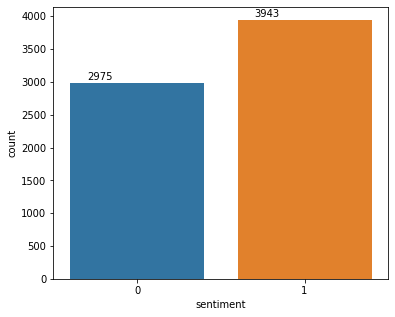

In [58]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure( figsize=(6,5))


# create count plot
ax = sn.countplot(x='sentiment', data=train_ds)

# annotate
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

# Inference from count plot

The positive and negative sentiments are having fairly equal proportion

# Text Processing
# Conversion of Text data to Cross-sectional Data

# Count Vector Model - A process of converting text to cross-sectional data 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer


# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()


# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit( train_ds.text )

In [60]:
feature_vector

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [61]:
# Get the feature names
features = feature_vector.get_feature_names()
print( "Total number of features: ", len(features))

Total number of features:  2132


In [62]:
features

['00',
 '007',
 '10',
 '10pm',
 '12',
 '16',
 '17',
 '1984',
 '1st',
 '200',
 '2007',
 '286',
 '2nd',
 '30',
 '31st',
 '33',
 '3333',
 '385',
 '50',
 '517',
 '648',
 '6th',
 '700',
 '7th',
 '8230',
 '9am',
 'aaron',
 'able',
 'abortion',
 'about',
 'abrams',
 'absolute',
 'absolutely',
 'absurd',
 'academy',
 'acceptable',
 'accompaniment',
 'according',
 'account',
 'achieved',
 'aching',
 'acne',
 'acoustic',
 'acting',
 'action',
 'actor',
 'actors',
 'actual',
 'actually',
 'adaptation',
 'add',
 'addition',
 'admired',
 'admiring',
 'adorable',
 'adore',
 'adult',
 'adversity',
 'afraid',
 'after',
 'afterschool',
 'afterwards',
 'again',
 'against',
 'ago',
 'agree',
 'agreed',
 'ah',
 'aimee',
 'ain',
 'aka',
 'al',
 'alarm',
 'all',
 'allegedly',
 'allegory',
 'almost',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'altogether',
 'always',
 'am',
 'amazes',
 'amazing',
 'amazingly',
 'america',
 'amã',
 'an',
 'anatomy',
 'anax',
 'and',
 'ang',
 'angel',
 'angels',


In [16]:
import random
random.sample(features, 10)

['gays',
 'along',
 'giving',
 'academy',
 'van',
 'song',
 'nc',
 'wanted',
 'cake',
 'schools']

In [63]:
train_ds_features = count_vectorizer.transform( train_ds.text )
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [64]:
train_ds_features.shape

(6918, 2132)

In [65]:
# Converting the matrix to a dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())
# Setting the column names to the features i.e. words
train_ds_df.columns = features

In [66]:
train_ds_df

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_ds[0:1]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.


In [22]:
train_ds_df.iloc[0:1, 150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


In [23]:
train_ds_df[['the', 'da', "vinci", "code", "book", 'is', 'just', 'awesome']][0:1]

,the,da,vinci,code,book,is,just,awesome
0,1,1,1,1,1,1,1,1


# Extarct relivant words which are having atleast good amount of frequency

In [67]:
# summing up the occurances of features column wise
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts_df = pd.DataFrame( dict( features = features,counts = features_counts ) )

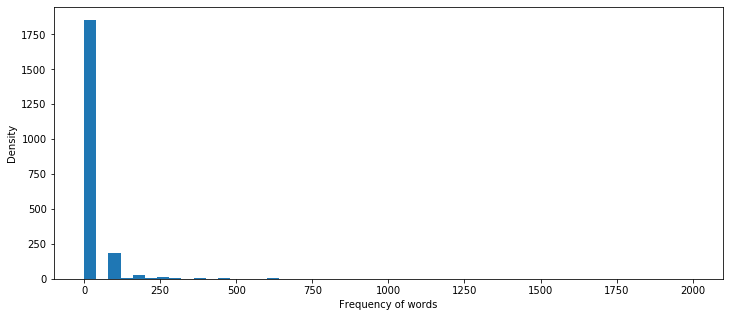

In [68]:
plt.figure( figsize=(12,5))
plt.hist(feature_counts_df.counts, bins=50, range = (0, 2000));
plt.xlabel( 'Frequency of words' )
plt.ylabel( 'Density' );

In [69]:
len(feature_counts_df[feature_counts_df.counts == 1])

1228

In [70]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000)
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit( train_ds.text )
# Get the feature names
features = feature_vector.get_feature_names()
# Transform the document into vectors
train_ds_features = count_vectorizer.transform( train_ds.text )
# Count the frequency of the features
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,counts = features_counts ) )

In [71]:
feature_counts.sort_values('counts',ascending = False)[0:15]

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


# Remove STOPWORD like is, am are , the

In [72]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
#Printing first few stop words
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['ie', 'ten', 'he', 'were', 'hereby', 'nor', 'was', 'find', 'amount', 'whereupon']


In [73]:
# Adding custom words to the list of stop words
my_stop_words = text.ENGLISH_STOP_WORDS.union( ['harry', 'potter', 'code', 'vinci', 'da',
'harri', 'mountain', 'movie', 'movies'])

In [74]:
# Setting stop words list
count_vectorizer = CountVectorizer( stop_words = my_stop_words, max_features = 1000 )
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
counts = features_counts ) )

In [75]:
feature_counts.sort_values( "counts", ascending = False )[0:15]

,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


# Data Cleaning - Stemming or Lemmatization

### To get words into root form and hence in a motivation of decreasing few more features

In [76]:
#1. PorterStemmer
#2. LancasterStemmer

In [77]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()



#Custom function for stemming and stop word removal
def stemmed_words(doc):
    ### Stemming of words
    stemmed_words = (stemmer.stem(w) for w in analyzer(doc))
    ### Remove the words in stop words list
    non_stop_words = [ word for word in list(set(stemmed_words) - set(my_stop_words)) ]
    return non_stop_words

In [78]:
count_vectorizer = CountVectorizer( analyzer=stemmed_words, max_features = 1000)
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
counts = features_counts ) )
feature_counts.sort_values( "counts", ascending = False )[0:15]

,features,counts
80,brokeback,1930
406,love,1837
801,suck,1378
922,wa,1142
43,awesom,1116
432,mission,1090
344,imposs,1090
438,movi,1052
392,like,823
298,hate,636


In [79]:
# Convert the document vector matrix into dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())
# Assign the features names to the column
train_ds_df.columns = features
# Assign the sentiment labels to the train_ds
train_ds_df['sentiment'] = train_ds.sentiment

In [80]:
train_ds_df

,10,17,33,6th,abl,absolut,absurd,academi,accept,accompani,...,year,yesterday,yip,young,younger,yuck,yuh,zach,zen,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,train_ds.sentiment,test_size = 0.3,random_state = 42 )

# Naive Bayes Model for Sentiment Classification

In [82]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit( train_X.toarray(), train_y )

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [83]:
test_ds_predicted = nb_clf.predict( test_X.toarray() )

In [84]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



In [86]:
model_obj = nb_clf
model_name = "Binomial Naive Bayes Classifier"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)


df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094


# Logistic Regression 

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X.toarray(), train_y)
test_ds_predicted = logreg.predict( test_X.toarray() )

In [88]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      1.00      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [89]:
model_obj = logreg
model_name = "Logistic Regression"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736


# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')

decision_tree.fit(train_X.toarray(), train_y)
test_ds_predicted = decision_tree.predict( test_X.toarray() )

In [91]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [92]:
model_obj = decision_tree
model_name = "Decission Tree"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.98, 0.99, 1.0]",0.92-1.0,0.031305


# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

In [94]:
random_forest.fit(train_X.toarray(), train_y)
test_ds_predicted = random_forest.predict( test_X.toarray() )

In [95]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [96]:
model_obj = random_forest
model_name = "Random Forest"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.98, 0.99, 1.0]",0.92-1.0,0.031305
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100


# XG Boost

In [97]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()

In [98]:
xgboost.fit(train_X.toarray(), train_y)
test_ds_predicted = xgboost.predict( test_X.toarray() )

In [99]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [100]:
model_obj = xgboost
model_name = "XG Boost"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.98, 0.99, 1.0]",0.92-1.0,0.031305
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.98, 0.99, 0.99, 1.0]",0.95-1.0,0.019235


# SGD Classifier

In [101]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

sgd = OneVsRestClassifier(SGDClassifier())

In [102]:
sgd.fit(train_X.toarray(), train_y)
test_ds_predicted = sgd.predict( test_X.toarray() )

In [103]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      1.00      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [104]:
model_obj = sgd
model_name = "Stochastic Gradient Descent"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.98, 0.99, 1.0]",0.92-1.0,0.031305
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.98, 0.99, 0.99, 1.0]",0.95-1.0,0.019235
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 0.99, 1.0]",0.96-1.0,0.015166


# Gaussian Process Classifier

In [105]:
from sklearn.gaussian_process import GaussianProcessClassifier
gausian_process = GaussianProcessClassifier()

In [106]:
gausian_process.fit(train_X.toarray(), train_y)
test_ds_predicted = gausian_process.predict( test_X.toarray() )

In [107]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       873
           1       0.98      1.00      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.98      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [108]:
model_obj = gausian_process
model_name = "Gausian Process"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.98, 0.99, 1.0]",0.92-1.0,0.031305
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.98, 0.99, 0.99, 1.0]",0.95-1.0,0.019235
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 0.99, 1.0]",0.96-1.0,0.015166
0,Bag Of Words with NLTK Stemming,Gausian Process,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100


# KNN Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [110]:
knn.fit(train_X.toarray(), train_y)
test_ds_predicted = knn.predict( test_X.toarray() )

In [111]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       873
           1       0.97      1.00      0.99      1203

    accuracy                           0.98      2076
   macro avg       0.99      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



In [112]:
model_obj = knn
model_name = "K Nearst Neighbour"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.98, 0.99, 1.0]",0.92-1.0,0.031305
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.98, 0.99, 0.99, 1.0]",0.95-1.0,0.019235
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 0.99, 1.0]",0.96-1.0,0.015166
0,Bag Of Words with NLTK Stemming,Gausian Process,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,K Nearst Neighbour,"[0.92, 0.97, 0.99, 0.99, 1.0]",0.92-1.0,0.032094


# Linear Discriminant Analysis

In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [114]:
lda.fit(train_X.toarray(), train_y)
test_ds_predicted = lda.predict( test_X.toarray() )

In [115]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076



In [116]:
model_obj = lda
model_name = "Linear Discriminant Analysis"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.98, 0.99, 1.0]",0.92-1.0,0.031305
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.98, 0.99, 0.99, 1.0]",0.95-1.0,0.019235
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 0.99, 1.0]",0.96-1.0,0.015166
0,Bag Of Words with NLTK Stemming,Gausian Process,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,K Nearst Neighbour,"[0.92, 0.97, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Linear Discriminant Analysis,"[0.98, 0.99, 0.99, 0.99, 1.0]",0.98-1.0,0.007071


# Support Vector Machine

In [117]:
from sklearn.svm import SVC
svm = SVC()

In [118]:
svm.fit(train_X.toarray(), train_y)
test_ds_predicted = svm.predict( test_X.toarray() )

In [119]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       873
           1       0.97      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



In [120]:
model_obj = svm
model_name = "Support Vector Machine"
process = "Bag Of Words with NLTK Stemming"
n_splits = 5
X = train_ds_features.toarray()
y = train_ds.sentiment
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)
df_model_selection

,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Binomial Naive Bayes Classifier,"[0.92, 0.98, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Logistic Regression,"[0.95, 0.99, 0.99, 1.0, 1.0]",0.95-1.0,0.020736
0,Bag Of Words with NLTK Stemming,Decission Tree,"[0.92, 0.98, 0.98, 0.99, 1.0]",0.92-1.0,0.031305
0,Bag Of Words with NLTK Stemming,Random Forest,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,XG Boost,"[0.95, 0.98, 0.99, 0.99, 1.0]",0.95-1.0,0.019235
0,Bag Of Words with NLTK Stemming,Stochastic Gradient Descent,"[0.96, 0.98, 0.99, 0.99, 1.0]",0.96-1.0,0.015166
0,Bag Of Words with NLTK Stemming,Gausian Process,"[0.94, 0.99, 0.99, 1.0, 1.0]",0.94-1.0,0.025100
0,Bag Of Words with NLTK Stemming,K Nearst Neighbour,"[0.92, 0.97, 0.99, 0.99, 1.0]",0.92-1.0,0.032094
0,Bag Of Words with NLTK Stemming,Linear Discriminant Analysis,"[0.98, 0.99, 0.99, 0.99, 1.0]",0.98-1.0,0.007071


In [121]:
df_model_selection.to_csv("Model_statistics.csv",index = False)

# Using TF-IDF Vectorizer

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( analyzer=stemmed_words,max_features = 1000)


feature_vector = tfidf_vectorizer.fit( train_ds.text )
train_ds_features = tfidf_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()

In [115]:
features

['10',
 '17',
 '33',
 '6th',
 'abl',
 'absolut',
 'absurd',
 'academi',
 'accept',
 'accompani',
 'ach',
 'acn',
 'act',
 'action',
 'actor',
 'actual',
 'admir',
 'ador',
 'adult',
 'ago',
 'agre',
 'alreadi',
 'alway',
 'amaz',
 'ang',
 'angel',
 'ani',
 'anim',
 'anyon',
 'anyth',
 'appar',
 'appeal',
 'articl',
 'asian',
 'ask',
 'asleep',
 'ass',
 'attempt',
 'attract',
 'audrey',
 'author',
 'aw',
 'award',
 'awesom',
 'awesomest',
 'azkaban',
 'bad',
 'ball',
 'ban',
 'bang',
 'basic',
 'bean',
 'beat',
 'beauti',
 'becaus',
 'becom',
 'befor',
 'begin',
 'believ',
 'besid',
 'best',
 'better',
 'bias',
 'big',
 'bit',
 'bitch',
 'black',
 'blame',
 'blond',
 'blood',
 'board',
 'bobbypin',
 'bodi',
 'bogu',
 'bonker',
 'book',
 'bore',
 'bought',
 'boycot',
 'brilliant',
 'brokeback',
 'brown',
 'btw',
 'bullshit',
 'butt',
 'buy',
 'bye',
 'came',
 'capot',
 'car',
 'care',
 'case',
 'catch',
 'catcher',
 'challeng',
 'chang',
 'charact',
 'children',
 'chines',
 'choic',
 'ch

# Using TF-IDF after Stemming

In [116]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Z003RJMK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
import nltk
from nltk.stem import PorterStemmer
# library for regular expressions
import re
stemmer = PorterStemmer()

In [118]:
def get_stemmed_tokens( doc ):
    # Tokenize the documents to words
    all_tokens = [word for word in nltk.word_tokenize(doc)]
    clean_tokens = []
    # remove the all characters other than alphabets. It takes a regex for matching.
    for each_token in all_tokens:
        if re.search('[a-zA-Z]', each_token):
            clean_tokens.append(each_token)
    
    
    # Stem the words
    stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
    return stemmed_tokens

In [119]:
tfidf_vectorizer = TfidfVectorizer(max_features=500,
stop_words='english',
tokenizer=get_stemmed_tokens,
ngram_range=(1,2))
feature_vector = tfidf_vectorizer.fit( train_ds.text )
train_ds_features = tfidf_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()

In [120]:
from sklearn.naive_bayes import GaussianNB
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,train_ds.sentiment,test_size = 0.3,random_state = 42 )
nb_clf = GaussianNB()
nb_clf.fit( train_X.toarray(), train_y )

GaussianNB(priors=None, var_smoothing=1e-09)

In [121]:
test_ds_predicted = nb_clf.predict( test_X.toarray() )
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



# Build the model using n-grams

In [122]:
tfidf_vectorizer = TfidfVectorizer(max_features=500,stop_words='english',tokenizer=get_stemmed_tokens,ngram_range=(2,4))

In [123]:
feature_vector = tfidf_vectorizer.fit( train_ds.text )
train_ds_features = tfidf_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()

In [124]:
features

["'m",
 "'re",
 "'re gon",
 "'s",
 "'s great",
 "'s like",
 "'s mom",
 "'s onli",
 "'s retart",
 "'s right",
 "'s stupid",
 "'yeah",
 "'yeah got",
 'absolut',
 'absolut awesom',
 'accept',
 'ach',
 'ach cock',
 'acn',
 'acn love',
 'alway',
 'alway know',
 'anyon',
 'anyon say',
 'ass',
 'award',
 'award remind',
 'awesom',
 'awesom book',
 'awesom ca',
 'awesom movi',
 "awesom n't",
 'awesom stori',
 'awesome..',
 'b',
 'b suck',
 'beauti',
 'becaus',
 'becaus awesom',
 'becaus hate',
 'becaus know',
 'becaus like',
 'becaus love',
 'becaus outshin',
 'becaus type',
 'becom',
 'becom accept',
 'begin',
 'better',
 'better read',
 'big',
 'big time',
 'bitch',
 'black',
 'black guy',
 'blond',
 'blond rock-hard',
 'bobbypin',
 'bobbypin insan',
 'bonker',
 'book',
 'book catcher',
 'bore',
 'brokeback',
 'brokeback mountain',
 'bye..',
 'ca',
 "ca n't",
 'care',
 'care anyon',
 'catcher',
 'catcher tye',
 'charact',
 'charact die',
 'clean',
 'clean tabl',
 'cock',
 'code',
 'code awes

In [70]:
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,train_ds.sentiment,test_size = 0.3,random_state = 42 )
nb_clf = BernoulliNB()
nb_clf.fit( train_X.toarray(), train_y )
test_ds_predicted = nb_clf.predict( test_X.toarray() )
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       873
           1       0.96      1.00      0.98      1203

   micro avg       0.97      0.97      0.97      2076
   macro avg       0.98      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076



# SAVE ML MODEL

In [125]:
import pickle

In [126]:
pickle.dump(nb_clf, open("Sentiment_Classifier_model.sav", 'wb'))

# REVOKE THE MODEL BACK AND USE IT for PREDICTION

In [127]:
# load the model from disk
loaded_model = pickle.load(open("Sentiment_Classifier_model.sav", 'rb'))

In [128]:
loaded_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
test_ds_predicted = loaded_model.predict( test_X.toarray() )